# Unity ML-Agents Toolkit
##  Gym Wrapper Basics
This notebook contains a walkthrough of the basic functions of the Python Gym Wrapper for the Unity ML-Agents toolkit. For instructions on building a Unity environment, see [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Getting-Started-with-Balance-Ball.md).

## Single-Agent Environments

The first five steps show how to use the `UnityEnv` wrapper with single-agent environments. See below step five for how to use with multi-agent environments.

### 1. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from gym_unity.envs import UnityEnv

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


### 2. Start the environment
`UnityEnv` launches and begins communication with the environment when instantiated. We will be using the `GridWorld` environment. You will need to create an `envs` directory within the  `/python` subfolder of the repository, and build the GridWorld environment to that directory. For more information on building Unity environments, see [here](../docs/Learning-Environment-Executable.md).

In [3]:
env_name = "../../env/GridWorld"  # Name of the Unity environment binary to launch
env = UnityEnv(env_name, worker_id=0, use_visual=True)

# Examine environment parameters
print(str(env))

INFO:mlagents.envs:
'GridAcademy' started successfully!
Unity Academy name: GridAcademy
        Number of Brains: 1
        Number of External Brains : 1
        Reset Parameters :
		numGoals -> 1.0
		numObstacles -> 1.0
		gridSize -> 5.0
Unity brain name: GridWorldBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): [5]
        Vector Action descriptions: 
INFO:gym_unity:1 agents within environment.


<UnityEnv instance>


### 3. Examine the observation and state spaces
We can reset the environment to be provided with an initial observation of the environment.

Agent observations look like:


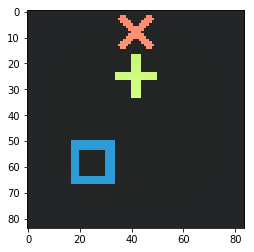

In [4]:
# Reset the environment
initial_observation = env.reset()

if len(env.observation_space.shape) == 1:
    # Examine the initial vector observation
    print("Agent state looks like: \n{}".format(initial_observation))
else:
    # Examine the initial visual observation
    print("Agent observations look like:")
    if env.observation_space.shape[2] == 3:
        plt.imshow(initial_observation[:,:,:])
    else:
        plt.imshow(initial_observation[:,:,0])

### 4. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions using the `env.action_space.sample()` function.

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [5]:
for episode in range(10):
    initial_observation = env.reset()
    done = False
    episode_rewards = 0
    while not done:
        observation, reward, done, info = env.step(env.action_space.sample())
        episode_rewards += reward
    print("Total reward this episode: {}".format(episode_rewards))

Total reward this episode: 0.5900000091642141
Total reward this episode: -1.069999998435378
Total reward this episode: 0.9100000020116568
Total reward this episode: 0.9300000015646219
Total reward this episode: 0.69000000692904
Total reward this episode: -1.0799999982118607
Total reward this episode: -1.119999997317791
Total reward this episode: -1.0099999774247408
Total reward this episode: -1.069999998435378
Total reward this episode: 0.7900000046938658


### 5. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [6]:
env.close()

## Multi-Agent Environments

It is also possible to use the gym wrapper with multi-agent environments. For these environments, observations, rewards, and done flags will be provided in a list. Likewise, the environment will expect a list of actions when calling `step(action)`.

### 1. Start the environment

We will use the `3DBall` environment for this walkthrough. For more information on building Unity environments, see [here](../docs/Learning-Environment-Executable.md). We will launch it from the `python/envs` sub-directory of the repo. Please create an `envs` folder if one does not already exist.

In [ ]:
# Name of the Unity environment binary to launch
multi_env_name = "../envs/3DBall"  
multi_env = UnityEnv(multi_env_name, worker_id=1, 
                     use_visual=False, multiagent=True)

# Examine environment parameters
print(str(multi_env))

### 2. Examine the observation space 

In [ ]:
# Reset the environment
initial_observations = multi_env.reset()

if len(multi_env.observation_space.shape) == 1:
    # Examine the initial vector observation
    print("Agent observations look like: \n{}".format(initial_observations[0]))
else:
    # Examine the initial visual observation
    print("Agent observations look like:")
    if multi_env.observation_space.shape[2] == 3:
        plt.imshow(initial_observations[0][:,:,:])
    else:
        plt.imshow(initial_observations[0][:,:,0])

### 3. Take random steps in the environment

In [ ]:
for episode in range(10):
    initial_observation = multi_env.reset()
    done = False
    episode_rewards = 0
    while not done:
        actions = [multi_env.action_space.sample() for agent in range(multi_env.number_agents)]
        observations, rewards, dones, info = multi_env.step(actions)
        episode_rewards += np.mean(rewards)
        done = dones[0]
    print("Total reward this episode: {}".format(episode_rewards))

### 4. Close the environment

In [ ]:
multi_env.close()